In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ssqueezepy import cwt, ssq_stft
import tensorflow as tf
import sklearn
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
from ssqueezepy import ssq_cwt, ssq_stft


In [3]:
from ssqueezepy import stft

In [4]:
import glob 


In [12]:
def viz(x, Tx, Wx):
    plt.imshow(np.abs(Wx), aspect='auto', cmap='turbo')
    plt.show()
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='turbo')
    plt.show()



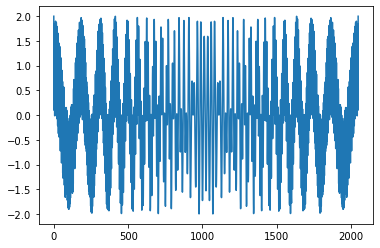

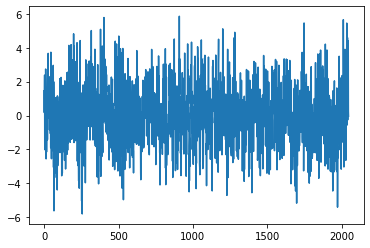

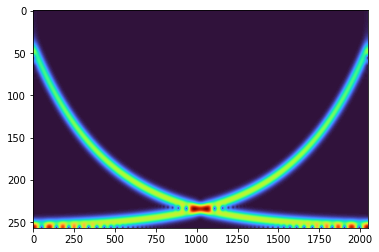

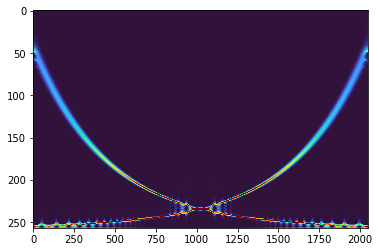

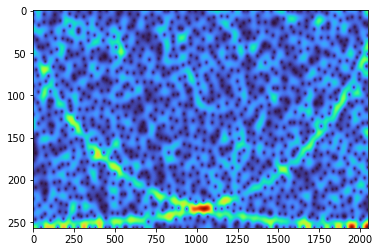

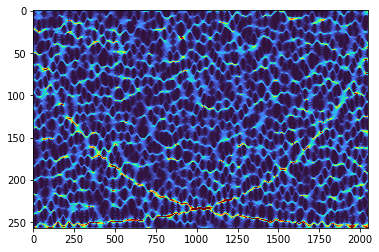

In [11]:


#%%# Define signal ####################################
N = 2048
t = np.linspace(0, 10, N, endpoint=False)
xo = np.cos(2 * np.pi * 2 * (np.exp(t / 2.2) - 1))
xo += xo[::-1]  # add self reflected
x = xo + np.sqrt(2) * np.random.randn(N)  # add noise

plt.plot(xo); plt.show()
plt.plot(x);  plt.show()


#%%# STFT + SSQ STFT ##################################
Tsxo, Sxo, *_ = ssq_stft(xo)
viz(xo, np.flipud(Tsxo), np.flipud(Sxo))

Tsx, Sx, *_ = ssq_stft(x)
viz(x, np.flipud(Tsx), np.flipud(Sx))

In [11]:
def viz(Wx):
    plt.imshow(np.abs(Wx), aspect='auto', cmap='turbo')
    plt.show()
    

In [6]:
def viz(Tx):
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='turbo')
    plt.show()

In [5]:
def viz(x, Tx, Wx):
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='turbo')
    plt.show()

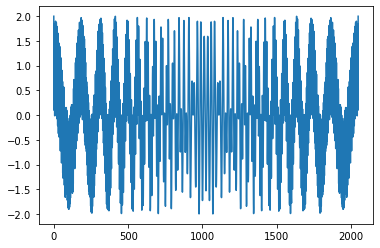

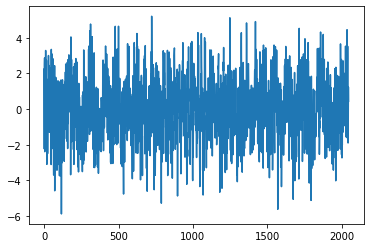

(2048,)


In [6]:
#%%# Define signal ####################################
N = 2048
t = np.linspace(0, 10, N, endpoint=False)
xo = np.cos(2 * np.pi * 2 * (np.exp(t / 2.2) - 1))
xo += xo[::-1]  # add self reflected
x = xo + np.sqrt(2) * np.random.randn(N)  # add noise

plt.plot(xo); plt.show()
plt.plot(x);  plt.show()

print(t.shape)

In [8]:
xo.shape

(2048,)

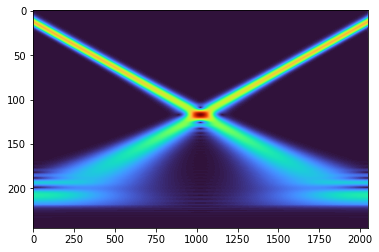

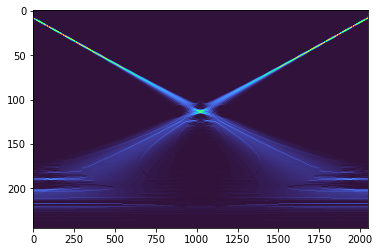

In [9]:
    x = np.random.randn(64)


In [15]:
Wx, *_ = cwt(x, 'cmhat', vectorized=True)


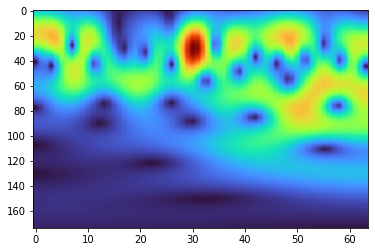

In [16]:
    plt.imshow(np.abs(Wx), aspect='auto', cmap='turbo')


In [12]:
Wx.shape

(162, 64)

In [10]:
x.shape

(64,)

In [34]:
x1=np.reshape(xo,(1,2048))

In [41]:
x1.shape

(2048, 1)

In [42]:
 Wxo, *_ = stft(x1)

In [44]:
Wxo

array([[1.9975148+0.j]], dtype=complex64)

In [28]:
x1=np.reshape(xo2048,1)

In [32]:
x1.shape

(1,)

In [31]:
Wxo.shape

(1,)

In [6]:
#%%# CWT + SSQ CWT ####################################
Twxo, Wxo, *_ = ssq_cwt(xo)
viz(xo, Twxo, Wxo)

Twx, Wx, *_ = ssq_cwt(x)
viz(x, Twx, Wx)

TypeError: viz() takes 1 positional argument but 3 were given

In [13]:
import cv2


In [6]:
#path = r'C:\Users\Haarika Manda\Desktop\3-2\Research folder\SR-20220413T092934Z-001\SR' # use your path
path=r'C:\Users\Haarika Manda\Desktop\3-2\Research folder\AFIB-20220413T092945Z-001\AFIB'

In [7]:
all_files = glob.glob(path + "/*.csv")



In [8]:
dfs1 = [pd.read_csv(f, header=None) for f in all_files]


In [9]:
data_SRtemp = np.array(dfs1)
print(data_SRtemp.shape)

(1780, 5000, 12)


In [10]:
print(data_SRtemp[0])

[[-2.9021e+01 -2.1163e+00  1.5329e+01 ... -5.6177e+01  3.5095e+01
   5.8160e+02]
 [-2.4839e+01  2.8884e-02  1.3270e+01 ... -5.7139e+01  2.9429e+01
   5.7561e+02]
 [-2.1031e+01  2.2048e+00  1.1618e+01 ... -5.8824e+01  2.3693e+01
   5.6928e+02]
 ...
 [-8.3175e+01 -6.6998e+01  9.5901e+00 ... -5.4045e+02 -4.2201e+02
  -7.0053e+01]
 [-7.0897e+01 -6.1023e+01  3.2168e+00 ... -4.6318e+02 -3.6982e+02
  -5.3853e+01]
 [-5.8889e+01 -5.6815e+01 -4.6549e+00 ... -3.9113e+02 -3.1966e+02
  -3.7852e+01]]


In [11]:
data_SR=data_SRtemp[:,:2000,:]

In [12]:
print(data_SR.shape)
X_data = []

(1780, 2000, 12)


In [13]:
data_SR[0,0,2:3] #lead 10

array([15.329])

In [ ]:
x_train_lead1=data_SR[0,:,3]
x_train_lead1= np.array(x_train_lead1)
data = np.reshape(x_train_lead1, 2000)
fs = 500
fft_size=250
overlap_fac=0.5
hop_size = np.int32(np.floor(fft_size * (1-overlap_fac)))
pad_end_size = fft_size          # the last segment can overlap the end of the data array by no more than one window size
total_segments = np.int32(np.ceil(len(data) / np.float32(hop_size)))
t_max = len(data) / np.float32(fs)
 
window = np.hanning(fft_size)  # our half cosine window
inner_pad = np.zeros(fft_size) # the zeros which will be used to double each segment size
 
proc = np.concatenate((data, np.zeros(pad_end_size)))              # the data to process
result = np.empty((total_segments, fft_size), dtype=np.float32)    # space to hold the result
 
for i in range(total_segments):                      # for each segment
    current_hop = hop_size * i                        # figure out the current segment offset
    segment = proc[current_hop:current_hop+fft_size]  # get the current segment
    windowed = segment * window                       # multiply by the half cosine function
    padded = np.append(windowed, inner_pad)           # add 0s to double the length of the data
    spectrum = np.fft.fft(padded) / fft_size          # take the Fourier Transform and scale by the number of samples
    autopower = np.abs(spectrum * np.conj(spectrum))  # find the autopower spectrum
    result[i, :] = autopower[:fft_size]               # append to the results array
 
#result = 20*np.log10(result)          # scale to db
#result = np.clip(result, -40, 200)    # clip values

In [20]:
print(result.shape)

(16, 250)


KeyboardInterrupt: 

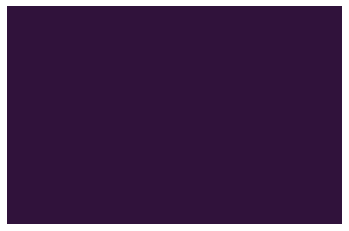

In [20]:
for i in range(0,100):
    x_train_lead1=data_SR[i,:,1]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    f1=np.reshape(flat_arr,(2000,1))
    Tsxo, Sxo, *_ = stft(f1)
    #Tx, *_ = ssq_cwt(flat_arr)
    plt.imshow(np.abs(Tsxo), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


In [ ]:
for i in range(100,150):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    plt.imshow(np.abs(Tsxo), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


In [ ]:
for i in range(150,250):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    plt.imshow(np.abs(Tsxo), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


In [ ]:
for i in range(250,350):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    plt.imshow(np.abs(Tsxo), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


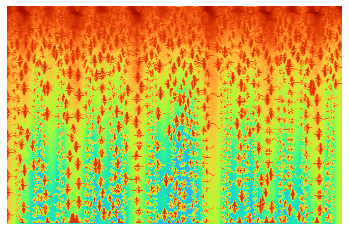

In [56]:
for i in range(350,400):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


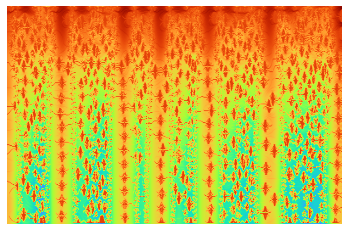

In [57]:
for i in range(400,500):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


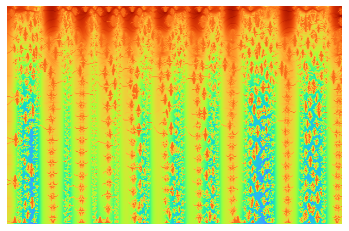

In [58]:
for i in range(500,600):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


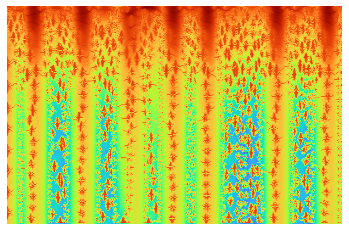

In [59]:
for i in range(600,700):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


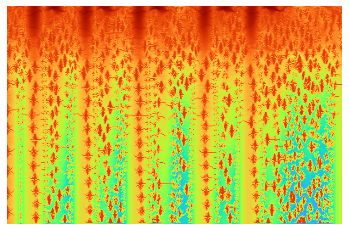

In [60]:
for i in range(700,800):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


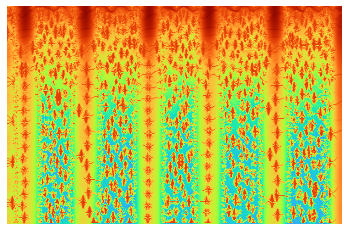

In [61]:
for i in range(800,900):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    #Tx, *_ = ssq_cwt(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


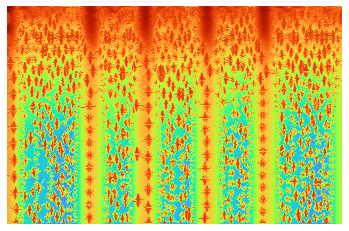

In [14]:
for i in range(900,1000):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tsxo, Sxo, *_ = ssq_stft(flat_arr)
    m=np.abs(Tsxo)
    plt.imshow(np.log(m,out=np.zeros_like(m), where=(m!=0)), aspect='auto',cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


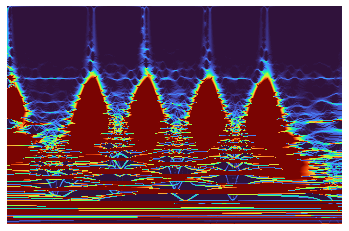

In [63]:
for i in range(900,1000):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Tx, *_ = ssq_cwt(flat_arr)
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)


In [41]:
X_data2=[]

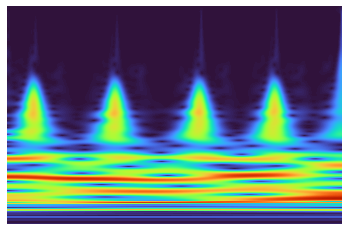

In [24]:
x_train_lead1=data_SR[0,:,1:2]
x_train_lead1= np.array(x_train_lead1)
flat_arr = np.reshape(x_train_lead1, 2000)
Twxo, Wxo, *_ = ssq_cwt(flat_arr)
image=plt.imshow(np.abs(Wxo), aspect='auto', cmap='turbo')
plt.axis('off')
X_data2.append (image)
#plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)
#buffer_.seek(0)

In [26]:
X_data2

(2000,)

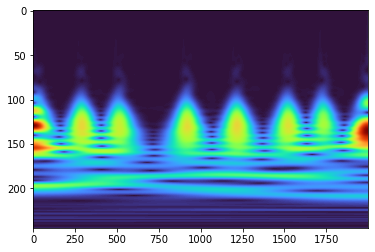

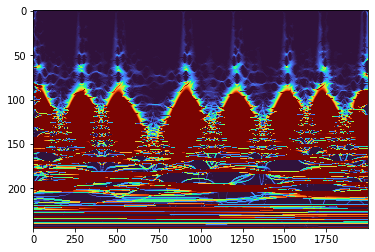

(1826, 5000, 12)
[[ 7.8118e+00  5.2652e+00  4.8999e+00 ...  3.0480e+01 -8.6037e+00
   5.7924e+02]
 [ 1.0128e+01  1.7153e+00 -1.0596e+00 ...  2.6486e+01 -8.1218e+00
   5.7289e+02]
 [ 1.3008e+01 -7.1541e-01 -6.4627e+00 ...  2.2823e+01 -7.3434e+00
   5.6510e+02]
 ...
 [ 1.5095e+01  1.0377e+01 -3.9869e-01 ...  1.5917e+01 -3.7415e+00
  -2.7067e+03]
 [ 2.6308e+01  1.7689e+01 -4.2200e+00 ...  1.8201e+01 -3.8020e+00
  -2.7567e+03]
 [ 4.0674e+01  2.6345e+01 -9.8475e+00 ...  2.1884e+01 -3.0115e+00
  -2.8089e+03]]
(1826, 2000, 12)


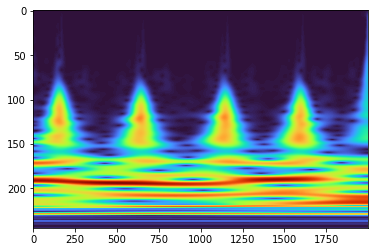

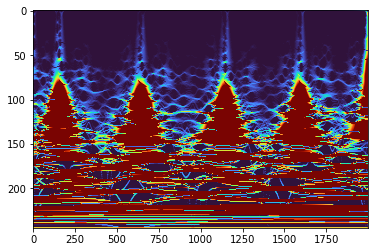

In [64]:
path = r'C:\Users\Haarika Manda\Desktop\3-2\Research folder\SR-20220413T092934Z-001\SR' # use your path
all_files = glob.glob(path + "/*.csv")

dfs1 = [pd.read_csv(f, header=None) for f in all_files]


data_SRtemp = np.array(dfs1)
print(data_SRtemp.shape)

print(data_SRtemp[0])

data_SR=data_SRtemp[:,:2000,:]

print(data_SR.shape)

x_train_lead1=data_SR[0,:,3:4]


x_train_lead1.shape

x_train_lead1= np.array(x_train_lead1)


flat_arr = np.reshape(x_train_lead1, 2000)


flat_arr.shape

Twxo, Wxo, *_ = ssq_cwt(flat_arr)

viz(flat_arr, Twxo, Wxo)




In [70]:
Wx.shape

(245, 2048)

In [ ]:
for i in range(600,700):
    x_train_lead1=data_SR[i,:,3]
    x_train_lead1= np.array(x_train_lead1)
    flat_arr = np.reshape(x_train_lead1, 2000)
    Wxo, *_ = cwt(flat_arr,'cmhat',vectorized=True)
    plt.imshow(np.abs(Wxo), aspect='auto', cmap='turbo')
    plt.axis('off')
    plt.savefig("{}.png".format(i), bbox_inches='tight',pad_inches = 0)
